# 2. Hierarchical clustering (계층적 군집 분석) 실습
https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from scipy.cluster.hierarchy import linkage, dendrogram
#이 함수로 hierarchical clustering 진행
from matplotlib import pyplot as plt

 ## 1. 샘플 데이터 생성 하여 계층적 군집 분석 실행

In [2]:
X = np.array([[5, 3],
             [10, 15],
             [15, 12], 
             [25, 10],
             [30, 30], 
             [85, 70], 
             [71, 80],
             [60, 78],
             [70, 55], 
             [80, 91]])

### 2. 샘플 데이터 시각화

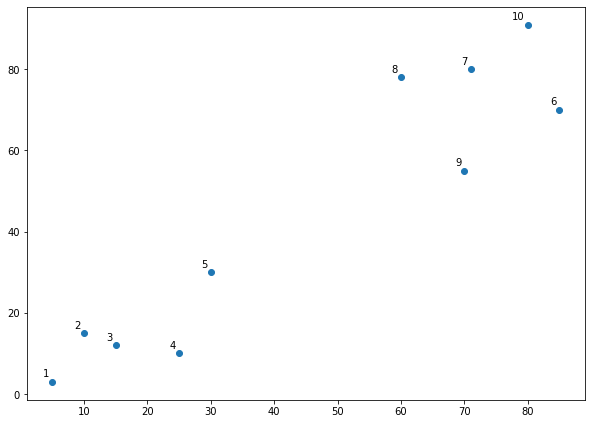

In [8]:
labels = range(1, 11)
plt.figure(figsize = (10, 7))
plt.subplots_adjust(bottom = 0.1)
plt.scatter(X[:, 0], X[:, 1],label = 'True position')

for label, x, y in zip(labels, X[:, 0], X[:, 1]):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (-3, 3), 
        textcoords = 'offset points',
        ha = 'right', va = 'bottom')
    
plt.show()

#시각화 관련 블로그 : https://bcho.tistory.com/1201

### 3. 덴도그램으로 hierarchical clustering 진행 후 시각화

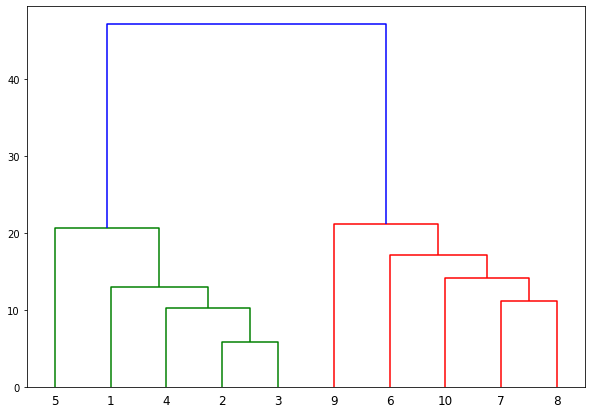

In [14]:
linked = linkage(X, 'single')

#덴도그램 시각화
labelList = range(1, 11)

plt.figure(figsize = (10, 7))
dendrogram(linked, 
        orientation = 'top', 
        labels = labelList, 
        distance_sort = 'descending', 
        show_leaf_counts = True)

plt.show()

#https://bcho.tistory.com/1204

## 2. 실제 데이터(shopping-data.csv)로 계층적 군집 분석 실행

In [16]:
cluster_data = pd.read_csv('/Users/jeonghyeonjeong/for github/머신러닝_데이터분석_dataset/shopping-data.csv')

In [18]:
cluster_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [23]:
#이 중 age, annual income, spending score만 가지고 clustering 질행 할 것이다. 
data = cluster_data.iloc[:, 3:5].values

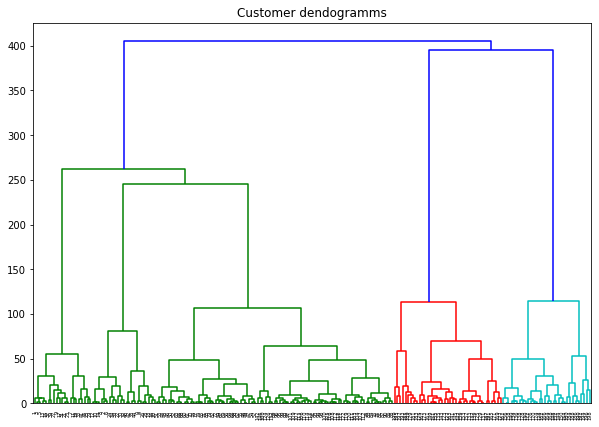

In [31]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize = (10, 7))
plt.title("Customer dendogramms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

In [33]:
#이제 데이터 세트의 클러스터 수를 알고 다음 단계는 데이터 포인트를이 5 개의 클러스터로 그룹화하는 것입니다. 
#이를 위해 다시 라이브러리 AgglomerativeClustering클래스를 사용합니다 sklearn.cluster.

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)

#이러면 첫번째 데이터가 그룹4,두 번째 데이터라 그룹3....이 되는 것이다. 

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

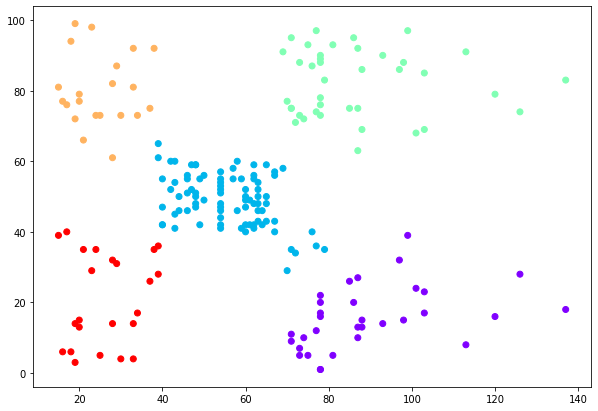

In [34]:
plt.figure(figsize = (10, 7))
plt.scatter(data[:,0], data[:, 1], c = cluster.labels_, cmap = 'rainbow')

## 3. 실제 데이터(보스턴 하우스 집값)으로 계층적 군집 분석 실행

In [35]:
#데이터 불러오기
data = pd.read_csv('/Users/jeonghyeonjeong/for github/머신러닝_데이터분석_dataset/Boston_house.csv')
data.head()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2


In [37]:
#데이터 설명데이터와 타겟데이터로 나누기
target = data['Target']
data = data.drop(['Target'], axis =1)

In [39]:
data.shape

(506, 13)

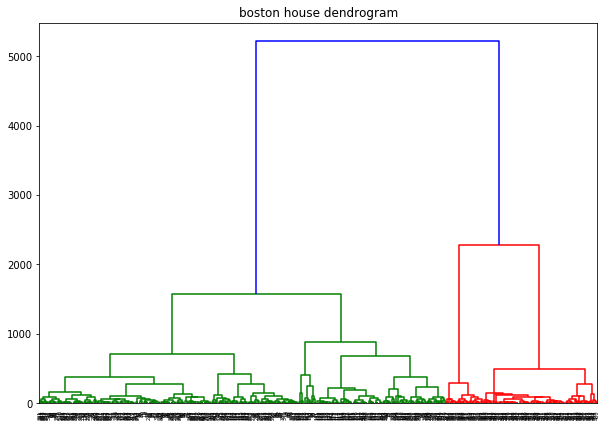

In [40]:
#데이터 시각화
plt.figure(figsize = (10, 7))
plt.title('boston house dendrogram')
dend = shc.dendrogram(shc.linkage(data, method='ward'))

In [42]:
#hiercarchical clustering 진행
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage= 'ward')
cluster.fit_predict(data)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [43]:
#clustering 결과가 위와 같이 나오는 걸 알 수 있고, 
# y가 0으로 clustering 된 것들의 평균은
np.mean([x for x, y in zip(target, cluster.fit_predict(data)) if y==0])

16.272262773722627

In [44]:
#y가 1으로 clustering 된 것의 평균은
np.mean([x for x, y in zip(target, cluster.fit_predict(data)) if y==1])

24.857181571815715

In [45]:
#둘의 차이가 분명히 나는 것으르 알 수 있다. (y==0 은 집값이 낮은 데이터 할당, y==1은 집값이 높으느 데이터 할당)

In [48]:
#describe함수를 사용해서 더 자세히 살펴보면
data.iloc[cluster.fit_predict(data) == 0, :].describe()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS
count,137.000000,137.000000,137.000000,137.000000,137.00000,137.000000,137.000000,137.000000,137.000000,137.000000,137.0,137.000000,137.000000
mean,89.967883,291.039051,6.006212,12.299162,2.05447,18.451825,18.674526,0.670102,20.196350,23.270073,0.0,667.642336,0.058394
std,12.469840,144.089867,0.713021,13.017296,0.60790,1.814342,6.873577,0.061051,0.018821,3.764196,0.0,8.469441,0.235348
min,40.300000,0.320000,3.561000,0.105740,1.12960,18.100000,2.960000,0.532000,20.100000,4.000000,0.0,666.000000,0.000000
25%,86.100000,210.970000,5.683000,5.441140,1.58950,18.100000,14.190000,0.614000,20.200000,24.000000,0.0,666.000000,0.000000
50%,94.500000,374.560000,6.152000,8.716750,1.92650,18.100000,18.050000,0.693000,20.200000,24.000000,0.0,666.000000,0.000000
75%,98.800000,395.280000,6.411000,14.236200,2.36820,18.100000,23.240000,0.713000,20.200000,24.000000,0.0,666.000000,0.000000
max,100.000000,396.900000,8.780000,88.976200,4.09830,27.740000,37.970000,0.770000,20.200000,24.000000,0.0,711.000000,1.000000


In [49]:
data.iloc[cluster.fit_predict(data) == 1, :].describe()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS
count,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000
mean,60.632249,381.042575,6.388005,0.388774,4.441272,8.420894,10.417453,0.511847,17.809214,4.455285,15.582656,311.926829,0.073171
std,28.217681,39.567014,0.670817,0.628724,2.097985,6.004356,5.831720,0.101241,2.210135,1.643095,26.086641,67.828288,0.260770
min,2.900000,70.800000,4.903000,0.006320,1.321600,0.460000,1.730000,0.385000,12.600000,1.000000,0.000000,187.000000,0.000000
25%,35.900000,383.780000,5.933000,0.057890,2.714700,4.000000,6.120000,0.437000,16.400000,4.000000,0.000000,270.000000,0.000000
50%,62.200000,392.780000,6.245000,0.131580,4.052200,6.410000,9.380000,0.493000,17.900000,4.000000,0.000000,304.000000,0.000000
75%,88.000000,396.330000,6.727000,0.369200,5.873600,10.010000,13.280000,0.544000,19.200000,5.000000,22.000000,384.000000,0.000000
max,100.000000,396.900000,8.725000,4.097400,12.126500,25.650000,34.410000,0.871000,22.000000,8.000000,100.000000,469.000000,1.000000


In [50]:
#y==0 인 그룹 : 집 값이 낮은 그룹 : CRIM(범죄율) 평균 = 12.299162
#y==1 인 그룹 : 집 값이 높은 그룹 : CRIM(범죄율) 평균 = 0.388774
#이런 차이를 보인다. 